In [11]:
#all the needed packages are added here

#!pip install textblob
#!pip install tweepy
#!pip install pillow

import tweepy
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud

# import TwitterCollector
from TwitterCollector import TwitterCollector

# you will use this later to specify the collection time window
from datetime import datetime

# you will use it to omit the words that should not count as the most repeated one
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arianayazdi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arianayazdi/nltk_data...


True

In [78]:
from nltk.corpus import wordnet

In [12]:
bearer_token= r"AAAAAAAAAAAAAAAAAAAAAI6RhwEAAAAAHOa71KfHtnqa2XMT%2FhrALmJcbW4%3DGMQxLm7HNiwzz10KYHmVDohY9wp6Dsfc5KHx9vJf0ZJTzT3rZk"
tc= TwitterCollector(bearer_token=bearer_token)

In [13]:
query = 'iran -is:retweet lang:en'

In [14]:
#Data will be collected and saved to a json file
recent_tweets = tc.fetch_recent_tweets(query = query  # specify the search query
                                            , tweets_cnt = 10000  # specify the number of tweets you want to collect
                                            , save_result = True  # if True, the tweets will be automatically saved to a json file apart from the value returned
                                            )

In [15]:
recent_tweets.keys()

dict_keys(['collection_type', 'collection_timestamp', 'query', 'tweet_cnt', 'tweets'])

In [107]:
recent_tweets['tweet_cnt']

10000

In [100]:
recent_tweets['tweets'][0]["created_at"]


'2022-10-14T22:14:21.000Z'

In [20]:
with open('recent_post_iran -is-retweet lang-en_10000.json') as json_file:
    json_cc_data=json.load(json_file)

In [21]:
json_cc_data['tweets'][8]['text']

'russians launch a large attack on my home city zaporizhzhia with iran-made drones. folks hear this buzz across the city, followed by big explosions \n\nhttps://t.co/bt5XskpsOn https://t.co/jaV9GJpUvB https://t.co/10giwPrUn3'

In [22]:
df_cc_data_tweets=pd.DataFrame(json_cc_data['tweets'])

In [103]:
df_cc_data_tweets['created_at'].min()

'2022-10-14T18:07:15.000Z'

In [108]:
df_cc_data_tweets['created_at'].max()

'2022-10-14T22:14:21.000Z'

In [28]:
words=[] #we make a null primary list
#then we would add the text of each tweet to the list words. 
for tweet in json_cc_data['tweets']:
    
    words.extend(tweet['text'].split()) #take care to use split function to have the words of each text, otherwise you'll get only charchters

print(type(words))
print(len(words))

<class 'list'>
301325


In [67]:
type(words)

list

In [88]:
for i in range(0, len(words)):
    words[i] = words[i].lower()

for i in range(0,len(words)):
    words[i] = words[i].replace('.', '')
    words[i] = words[i].replace(',', '')
    words[i] = words[i].replace('?','')
    words[i] = words[i].replace('!','')
    words[i] = words[i].replace('https:','')
    words[i] = words[i].replace('//tco/','')
    
#nltk stopwords 
stopwords = nltk.corpus.stopwords.words('english')
#add some other stopwords based on the topic and them to the list
list = ['people','iran']
for i in list:
    stopwords.append(i)

In [95]:
import string
words2=[]
for w in words:
    if w not in stopwords and len(w)>1 and not w.startswith('https') and '#' not in w and '@' not in w and w.isalpha():
        words2.append(w)
print(words2[:20])
print(type(words2))

['remember', 'young', 'girls', 'sons', 'protesting', 'getting', 'killed', 'fight', 'voice', 'sir', 'plz', 'change', 'screensaver', 'great', 'alright', 'lglawqsrbw', 'highschool', 'attack', 'irgc', 'islamic']
<class 'list'>


In [98]:
c=Counter(words2)
c.most_common(10)

[('islamic', 2362),
 ('iranian', 2000),
 ('students', 1975),
 ('regime', 1953),
 ('republic', 1866),
 ('voice', 1722),
 ('school', 1513),
 ('please', 1353),
 ('killed', 1274),
 ('freedom', 1057)]

In [43]:
!pip install Pillow

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

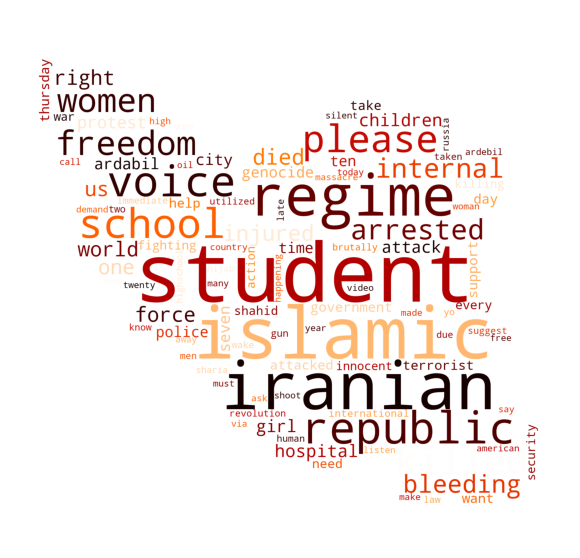

In [111]:
text=''
for t in words2:
    text += t + ' '
type(text)
mask1=np.array(Image.open('Map.png'))
wordcloud = WordCloud(width=800, height=400,mask=mask1, colormap='gist_heat',collocations=False,max_words=100,background_color='white').generate(text) 
plt.figure(figsize=(20,10)) # set up figure size
plt.imshow(wordcloud) # word cloud image show
plt.axis("off") # turn on axis
plt.savefig('iran_word_cloud2.png') # save as PNG file
#plt.savefig('my_word_cloud.pdf') # save as PDF file
plt.show()  # show in Jupyter notebook